In [150]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the data
orders_df = pd.read_csv('../data/Dataset.csv', encoding='Windows-1252')

In [151]:
orders_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,#NAME?,US-2019-103800,03/01/2019,07/01/2019,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,#NAME?,US-2019-112326,04/01/2019,08/01/2019,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,#NAME?,US-2019-112326,04/01/2019,08/01/2019,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,#NAME?,US-2019-112326,04/01/2019,08/01/2019,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,#NAME?,US-2019-141817,05/01/2019,12/01/2019,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,#NAME?,CA-2018-103772,28/06/2018,02/07/2018,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.560,2,0.0,54.9976
32480,#NAME?,CA-2018-103772,28/06/2018,02/07/2018,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-AR-10000538,Office Supplies,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",140.750,5,0.0,42.2250
32481,#NAME?,US-2018-151435,06/09/2018,09/09/2018,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
32482,#NAME?,CA-2018-100251,17/05/2018,23/05/2018,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200


## prep data

In [166]:
# Prepare the data
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format="%d/%m/%Y")
sales_data = orders_df.groupby('Order Date').agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'mean'}).reset_index()
sales_data.columns = ['ds', 'y', 'discount', 'profit']

# Add day of the week as a feature
sales_data['day_of_week'] = sales_data['ds'].dt.dayofweek

# Train-test split
train, test = train_test_split(sales_data, test_size=0.2, shuffle=False)

## omit outliers

In [167]:
def zscore(s, window, thresh=2, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)   
    m = z.between(-thresh, thresh)
    
    if return_all:
        return z, avg, std, m
    return s.where(m, avg)

In [168]:
train

,ds,y,discount,profit,day_of_week
0,2014-01-03,16.448,0.200000,5.551200,4
1,2014-01-04,288.060,0.400000,-21.996700,5
2,2014-01-05,19.536,0.200000,4.884000,6
3,2014-01-06,4407.100,0.000000,150.894711,0
4,2014-01-07,87.158,0.700000,-35.981050,1
...,...,...,...,...,...
2783,2022-11-03,7337.783,0.146429,37.398143,3
2784,2022-11-04,10668.096,0.352941,-234.543659,4
2785,2022-11-05,3189.938,0.180769,24.563969,5
2786,2022-11-06,4300.231,0.186207,19.376448,6


In [169]:
train['y'] = zscore(train['y'], window=50)

In [170]:
train

,ds,y,discount,profit,day_of_week
0,2014-01-03,16.448000,0.200000,5.551200,4
1,2014-01-04,288.060000,0.400000,-21.996700,5
2,2014-01-05,19.536000,0.200000,4.884000,6
3,2014-01-06,559.277464,0.000000,150.894711,0
4,2014-01-07,87.158000,0.700000,-35.981050,1
...,...,...,...,...,...
2783,2022-11-03,7337.783000,0.146429,37.398143,3
2784,2022-11-04,10668.096000,0.352941,-234.543659,4
2785,2022-11-05,3189.938000,0.180769,24.563969,5
2786,2022-11-06,4300.231000,0.186207,19.376448,6


In [171]:
train

,ds,y,discount,profit,day_of_week
0,2014-01-03,16.448000,0.200000,5.551200,4
1,2014-01-04,288.060000,0.400000,-21.996700,5
2,2014-01-05,19.536000,0.200000,4.884000,6
3,2014-01-06,559.277464,0.000000,150.894711,0
4,2014-01-07,87.158000,0.700000,-35.981050,1
...,...,...,...,...,...
2783,2022-11-03,7337.783000,0.146429,37.398143,3
2784,2022-11-04,10668.096000,0.352941,-234.543659,4
2785,2022-11-05,3189.938000,0.180769,24.563969,5
2786,2022-11-06,4300.231000,0.186207,19.376448,6


In [172]:
from prophet import Prophet

# Train the Prophet model with additional regressors
model = Prophet(interval_width = 0.95, seasonality_mode = 'multiplicative', daily_seasonality=True)
model.add_regressor('discount')
model.add_regressor('profit')
# model.add_regressor('day')
model.fit(train)

16:43:16 - cmdstanpy - INFO - Chain [1] start processing
16:43:16 - cmdstanpy - INFO - Chain [1] done processing


In [184]:
# Make future dataframe for prediction
future = model.make_future_dataframe(periods=len(test), freq='D')
future['discount'] = pd.concat([train['discount'], test['discount']])
future['profit'] = pd.concat([train['profit'], test['profit']])
future['day_of_week'] = future['ds'].dt.dayofweek

# Predict
forecast = model.predict(future)

# Merge actual and forecasted values
test_data = test.set_index('ds')
forecast = forecast.set_index('ds')
predicted = forecast[['yhat']].iloc[-len(test_data):]
merged_df = test_data.join(predicted, how='inner')

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def rmspe(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))
    return loss

In [186]:
display(mean_squared_error(merged_df['y'], merged_df['yhat'], squared=False))
display(rmspe(merged_df['y'], predicted['yhat']))
display(mean_absolute_percentage_error(merged_df['y'], merged_df['yhat']))

/Users/linusrandud/.pyenv/versions/GhostPostCC/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3243.509878986271

68.9448382190522

15.574894872616717

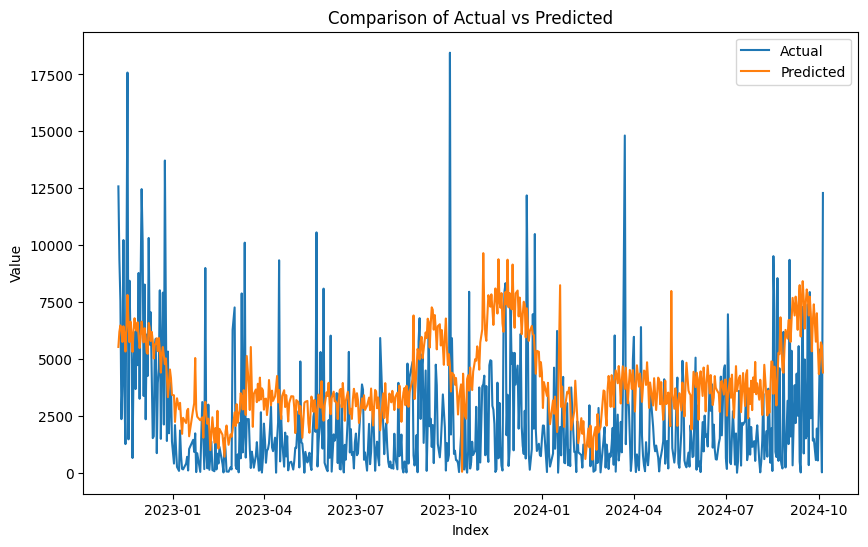

In [187]:
import matplotlib.pyplot as plt

# Assuming test_data['y'] and predicted['yhat'] are both arrays or lists of values
test_y = merged_df['y']
predicted_yhat = merged_df['yhat']

plt.figure(figsize=(10, 6))
plt.plot(test_y, label='Actual')
plt.plot(predicted_yhat, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted')
plt.legend()
plt.show()


In [188]:
sales_data

,ds,y,discount,profit,day_of_week
0,2014-01-03,16.4480,0.200000,5.551200,4
1,2014-01-04,288.0600,0.400000,-21.996700,5
2,2014-01-05,19.5360,0.200000,4.884000,6
3,2014-01-06,4407.1000,0.000000,150.894711,0
4,2014-01-07,87.1580,0.700000,-35.981050,1
...,...,...,...,...,...
3481,2024-12-26,814.5940,0.225000,15.280050,3
3482,2024-12-27,177.6360,0.300000,-15.987100,4
3483,2024-12-28,1657.3508,0.216842,13.322042,5
3484,2024-12-29,3102.7140,0.026667,47.332680,6


In [ ]:
for subcategory in sales_data['subcategory'].unique():
    print(f"Processing subcategory: {subcategory}")
    
    # Filter data for the current subcategory
    subcat_data = sales_data[sales_data['subcategory'] == subcategory]

    # Train-test split
    train_data, test_data = train_test_split(subcat_data, test_size=0.2, shuffle=False)

    # Train the Prophet model with additional regressors
    model = Prophet(interval_width=0.95, seasonality_mode='multiplicative', daily_seasonality=True)
    model.add_regressor('discount')
    model.add_regressor('profit')
    model.add_regressor('day_of_week')
    model.fit(train_data)

    # Make future dataframe for prediction
    future = model.make_future_dataframe(periods=len(test_data), freq='D')
    future['discount'] = pd.concat([train_data['discount'], test_data['discount']])
    future['profit'] = pd.concat([train_data['profit'], test_data['profit']])
    future['day_of_week'] = future['ds'].dt.dayofweek

    # Predict
    forecast = model.predict(future)

    # Merge actual and forecasted values
    test_data = test_data.set_index('ds')
    forecast = forecast.set_index('ds')
    predicted = forecast[['yhat']].iloc[-len(test_data):]
    merged_df = test_data.join(predicted, how='inner')
    
    # Store the results
    results[subcategory] = merged_df